In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('manufacturing.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [3]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [4]:
df.dtypes

Temperature (°C)                  float64
Pressure (kPa)                    float64
Temperature x Pressure            float64
Material Fusion Metric            float64
Material Transformation Metric    float64
Quality Rating                    float64
dtype: object

In [5]:
df = df.rename(columns={"Temperature (°C)":"Temperature",
                        "Pressure (kPa)":"Pressure",
                        "Temperature x Pressure":"Temperature*Pressure",
                        "Material Fusion Metric":"Material_Fusion_Metric",
                        "Material Transformation Metric":"Material_Transformation_Metric",
                        "Quality Rating":"Quality_Rating"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature                     3957 non-null   float64
 1   Pressure                        3957 non-null   float64
 2   Temperature*Pressure            3957 non-null   float64
 3   Material_Fusion_Metric          3957 non-null   float64
 4   Material_Transformation_Metric  3957 non-null   float64
 5   Quality_Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [7]:
df.head()

,Temperature,Pressure,Temperature*Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


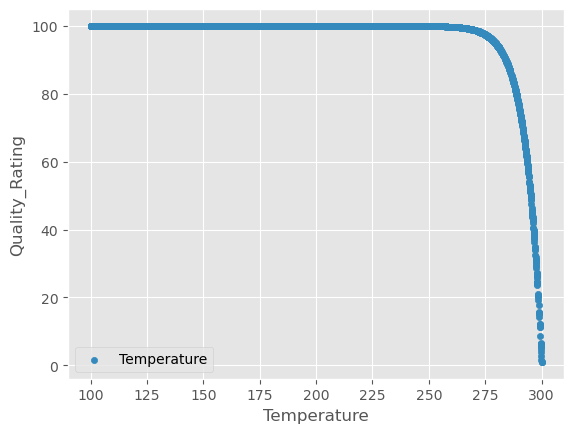

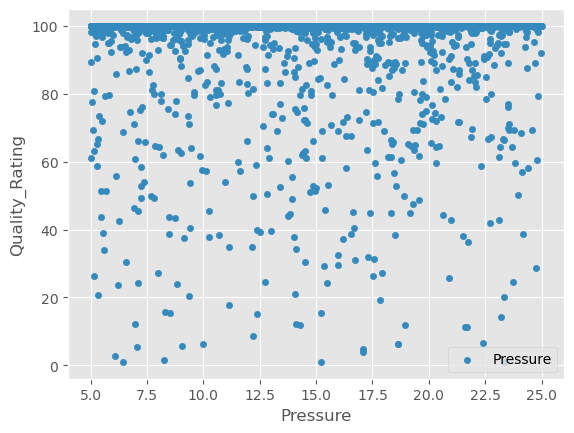

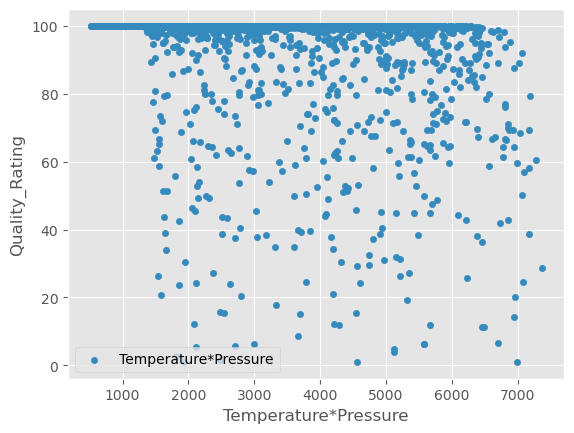

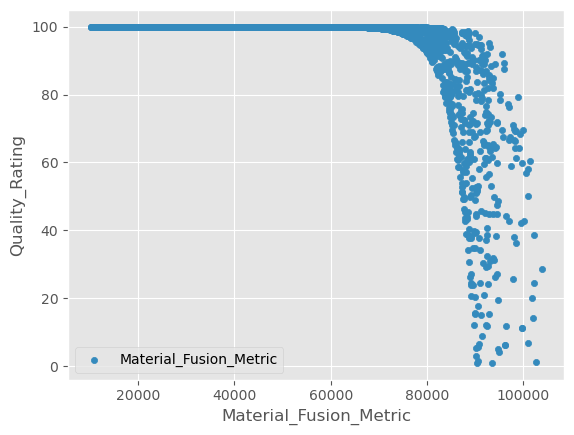

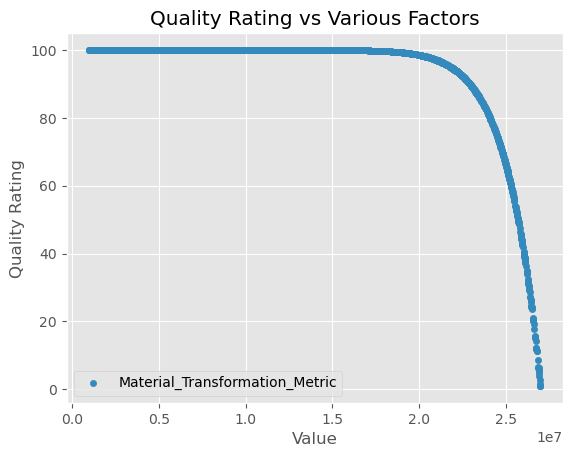

In [8]:
for col in df.columns:
    if col != 'Quality_Rating':
        df.plot(x=col,
                y='Quality_Rating',
                kind = 'scatter',
                label = col)

plt.title('Quality Rating vs Various Factors')
plt.xlabel('Value')
plt.ylabel('Quality Rating')
plt.legend()
plt.show()

As we can see in the previous plots, in some of the columns we have log relation in wrt X and in some we have log relation wrt y, next stop we can just try and create new variables with changing the old ones to capture this nonlinearity, and we tone it down to linear relationship

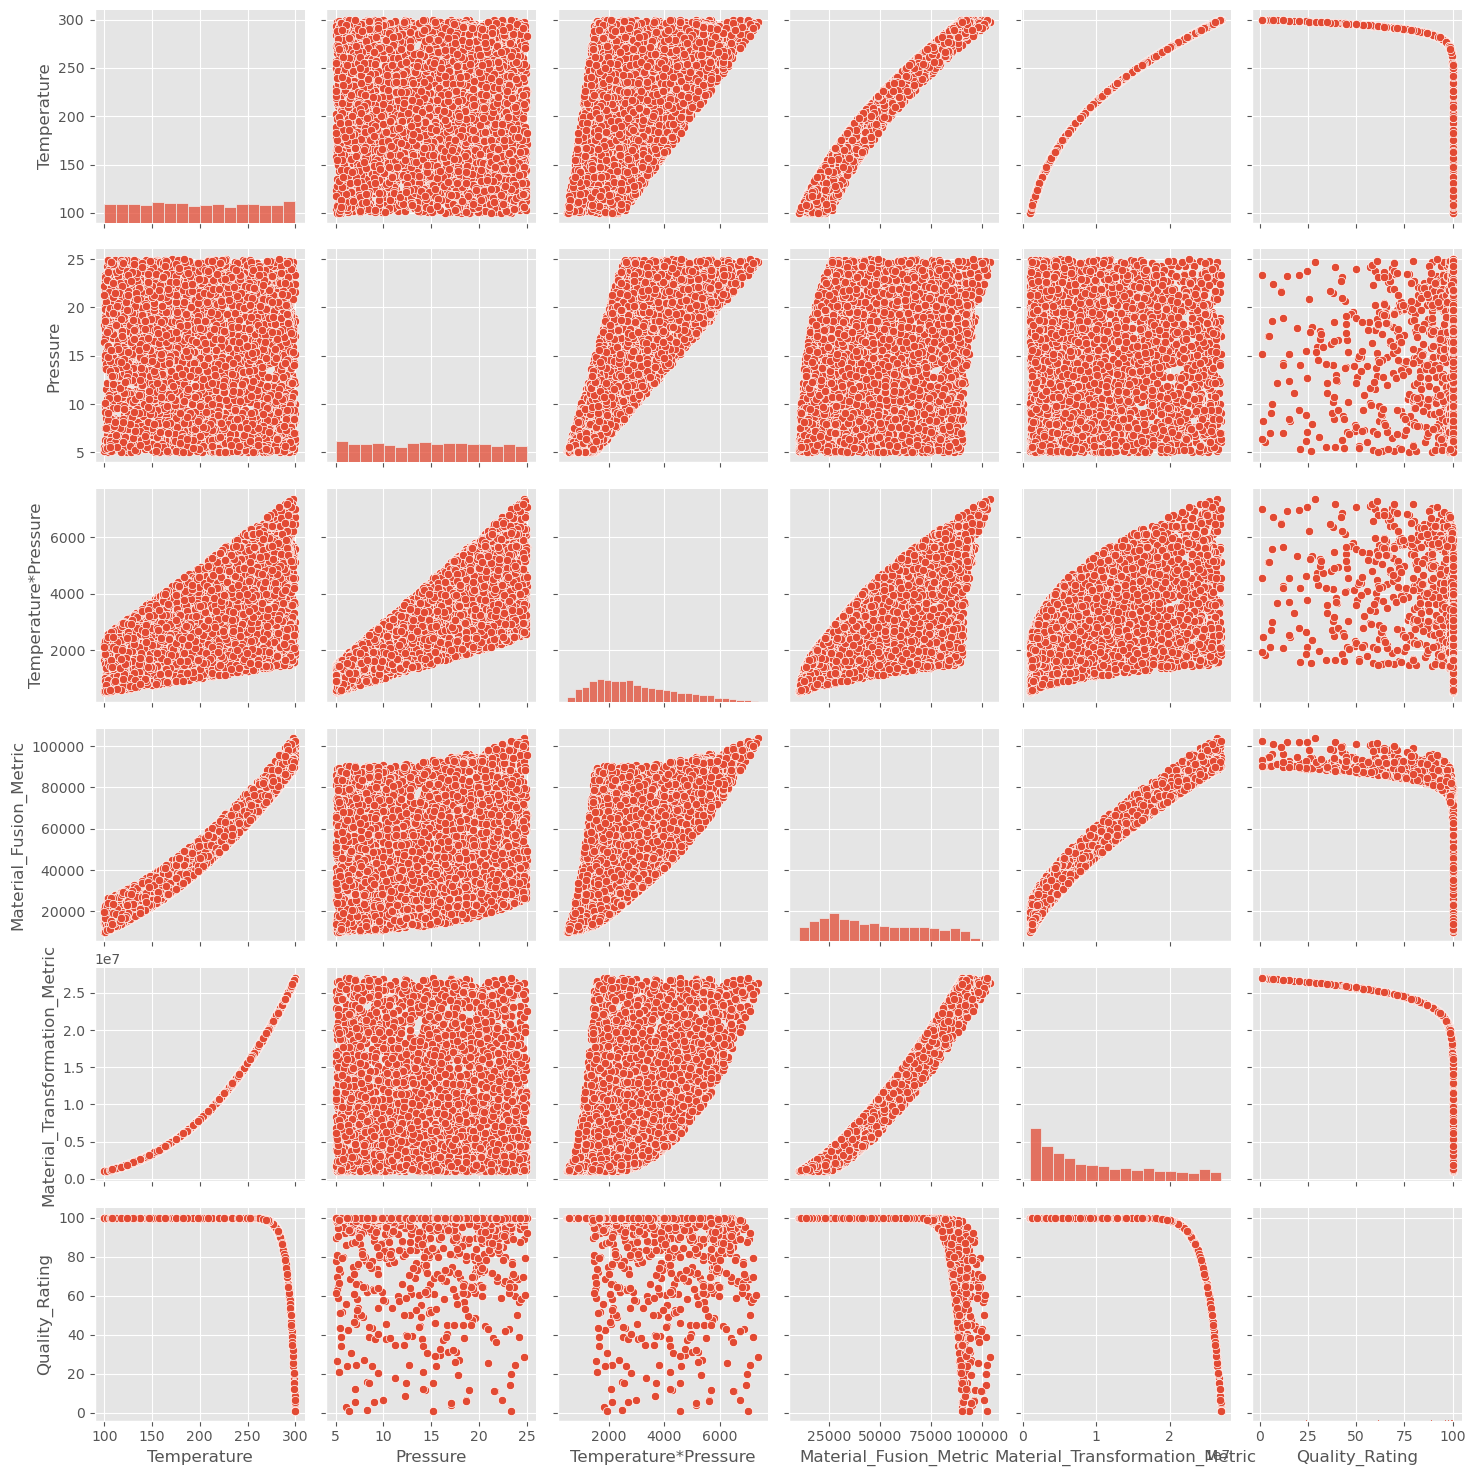

In [10]:
sns.pairplot(df)